**BI Lab 4: Star Wars**

In [1]:
#libraries to be used
import numpy as np 
import pandas as pd
import sys
import plotly.graph_objs as go
import plotly.express as px
from plotly import tools
from plotly.offline import init_notebook_mode,iplot
import warnings
warnings.filterwarnings("ignore")
from nltk.probability import FreqDist
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from lexical_diversity import lex_div as ld
import itertools
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.feature_extraction.text import CountVectorizer 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#nltk.download('vader_lexicon')
#nltk.download('stopwords')

------------

**Reading the script files**

In [2]:
#reading the script files
ep_IV = pd.read_csv('SW_EpisodeIV.txt', delim_whitespace=True, names=["index","character","dialogue"] ,header = None)
ep_V = pd.read_csv('SW_EpisodeV.txt', delim_whitespace=True, names=["index","character","dialogue"] ,header = None)
ep_VI = pd.read_csv('SW_EpisodeVI.txt', delim_whitespace=True, names=["index","character","dialogue"] ,header = None)


#displaying ep_VI for testing purposes
ep_VI


,index,character,dialogue
0,character,dialogue,NaN
1,1,SHUTTLE CAPTAIN,"Command station, this is ST 321. Code Clearanc..."
2,2,DEATH STAR CONTROLLER,The security deflector shield will be deactiva...
3,3,SHUTTLE CAPTAIN,We're starting our approach.
4,4,OFFICER,Inform the commander that Lord Vader's shuttle...
...,...,...,...
670,670,LANDO,"Wedge, I don't think we're going to make it."
671,671,WEDGE,You'll make it. Just follow me Gold Leader.
672,672,LANDO,I promised to return his ship without a scratc...
673,673,HAN,Lando...


Removing the first row from these scripts to exclude headers which are not of use

In [3]:
#dropping the first row, so using axis 0 with 0 index position
ep_IV = ep_IV.drop([0], axis=0)
ep_V = ep_V.drop([0], axis=0)
ep_VI = ep_VI.drop([0], axis=0)

Task 1: Find the characters with the most dialogues in each episode of The Original Trilogy (Episodes IV, V, VI).

In [4]:
#Top 5 characters with the highest volume of dialogues in Episode 4
d_IV=pd.DataFrame(ep_IV.character.value_counts()).iloc[:5,]
d_IV

,character
LUKE,254
HAN,153
THREEPIO,119
BEN,82
LEIA,57


In [5]:
#Top 5 characters with the highest volume of dialogues in Episode 5
d_V=pd.DataFrame(ep_V.character.value_counts()).iloc[:5,]
d_V

,character
HAN,182
LUKE,128
LEIA,114
THREEPIO,92
LANDO,61


In [6]:
#Top 5 characters with the highest volume of dialogues in Episode 6
d_VI=pd.DataFrame(ep_VI.character.value_counts()).iloc[:5,]
d_VI

,character
HAN,124
LUKE,112
THREEPIO,90
LEIA,56
VADER,43


---------------

Task 2: Plot the number of dialogues according to the character for each episode (i.e. plot the above findings).

In [32]:
#setting the line plot details
ep4 = go.Line(y=d_IV.character, x=d_IV.index,marker=dict(color="red",line=dict(color='black', width=3)),opacity=1)
ep5 = go.Line(y=d_V.character,x=d_V.index,marker=dict(color="blue",line=dict(color='black', width=3)),opacity=1)
ep6 = go.Line(y=d_VI.character, x=d_VI.index,marker=dict(color="forestgreen",line=dict(color='black', width=3)),opacity=1)
fig = tools.make_subplots(rows=3, cols=1,horizontal_spacing=1, subplot_titles=("Episode IV","Episode V","Episode VI"))
fig.append_trace(ep4, 1, 1)         
fig.append_trace(ep5, 2, 1)         
fig.append_trace(ep6, 3, 1) 
fig['layout'].update(showlegend=False ,height=1200,width=800,title="Characterwise Dialogues Count per Episode")
iplot(fig)

-------------

Task 3: Add a new column “episode” to the three datasets (to distinguish between the three episodes) and concatenate them into one dataset.

In [8]:
#creating a new column in each dataset for each episose
ep_IV['episode_no'] = 'IV'
ep_V['episode_no'] = 'V'
ep_VI['episode_no'] = 'VI'

In [9]:
#concatenating all the episodes into a single dataframe
combined_episode = [ep_IV, ep_V, ep_VI]

starwars = pd.concat(combined_episode)
starwars =starwars.reset_index()
starwars = starwars.drop(['index', 'level_0'], axis=1)
starwars

,character,dialogue,episode_no
0,THREEPIO,Did you hear that? They've shut down the main...,IV
1,THREEPIO,We're doomed!,IV
2,THREEPIO,There'll be no escape for the Princess this time.,IV
3,THREEPIO,What's that?,IV
4,THREEPIO,I should have known better than to trust the l...,IV
...,...,...,...
2518,LANDO,"Wedge, I don't think we're going to make it.",VI
2519,WEDGE,You'll make it. Just follow me Gold Leader.,VI
2520,LANDO,I promised to return his ship without a scratc...,VI
2521,HAN,Lando...,VI


-------------------

Task 4: Discover the frequency distribution of words in The Original Trilogy.

In [10]:
#showing Top 20 most frequently occuring words in these episodes
Frequency_Distribution = FreqDist(starwars['dialogue'])
Frequency_Distribution.most_common(20)

[('Yes, sir.', 9),
 ('What?', 8),
 ('Yes.', 6),
 ('Yes, my lord.', 6),
 ('No!', 5),
 ('Come on!', 5),
 ('What happened?', 4),
 ('What is it?', 4),
 ('As you wish.', 4),
 ('Where are you going?', 3),
 ('Oh, no!', 3),
 ('Chewie!', 3),
 ('Look!', 3),
 ('Yeah.', 3),
 ('Good luck.', 3),
 ('Thank you.', 3),
 ("We're doomed!", 2),
 ('What are you talking about?', 2),
 ("We're doomed.", 2),
 ('Uncle Owen...', 2)]

---------------

Task 5: Create a Frequency Distribution plot of the most repeated words in The Original Trilogy.

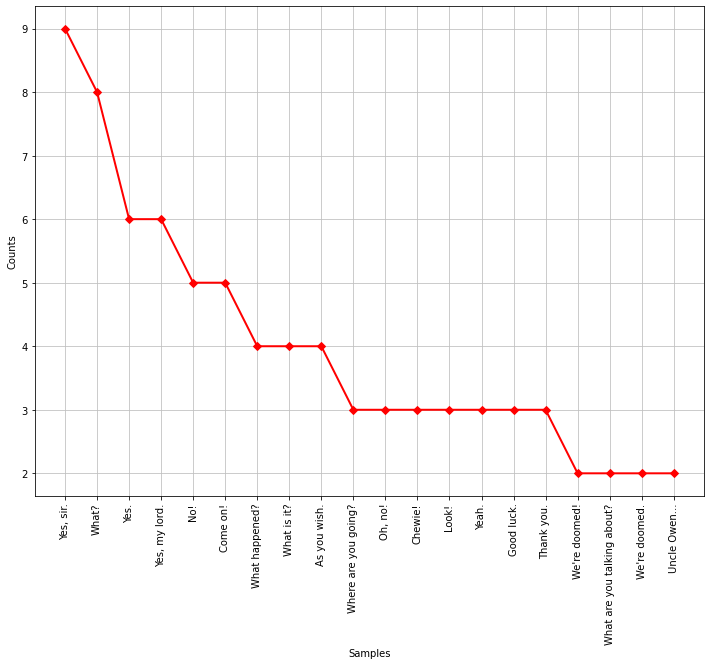

In [11]:
#plotting the Top 20 most frequently occuring words
figure = plt.figure(figsize = (12, 9))
fdist = FreqDist(Frequency_Distribution)
fdist.plot(20, cumulative=False, color='red', marker='D')
plt.show()

-----------------

Task 6: Perform text-mining operations to prepare your dataset for further text analysis. (Use the NLTK library)
a. Convert to lower case, word tokenization, removing stopwords, lexicon normalization (lemmatization), etc.
b. Add the resulting array list to the dataset as a new column, “new_script”.

In [12]:
#lemmatization using tokenization
starwars['new_script'] = starwars.dialogue.apply(lambda x: ld.flemmatize(x))

#removing Stopwords
stop_words = set(stopwords.words('english')) 
starwars['new_script'] = starwars.new_script.apply(lambda x: [item for item in x if item.lower() not in stop_words])

#removing punctuation
starwars['new_script'] =  starwars.new_script.apply(lambda x: [item for item in x if item.isalpha()])

In [13]:
starwars

,character,dialogue,episode_no,new_script
0,THREEPIO,Did you hear that? They've shut down the main...,IV,"[hear, theyve, shut, main, reactor, well, dest..."
1,THREEPIO,We're doomed!,IV,[doom]
2,THREEPIO,There'll be no escape for the Princess this time.,IV,"[therell, escape, princess, time]"
3,THREEPIO,What's that?,IV,[whats]
4,THREEPIO,I should have known better than to trust the l...,IV,"[know, better, trust, logic, halfsized, thermo..."
...,...,...,...,...
2518,LANDO,"Wedge, I don't think we're going to make it.",VI,"[wedge, dont, think, go, make]"
2519,WEDGE,You'll make it. Just follow me Gold Leader.,VI,"[youll, make, follow, gold, leader]"
2520,LANDO,I promised to return his ship without a scratc...,VI,"[promise, return, ship, without, scratchi, sur..."
2521,HAN,Lando...,VI,[lando]


------------

Task 7: Repeat steps 4 & 5, but check the frequency distribution of the “new_script” this time.

In [14]:
tokenization = starwars['new_script'].tolist()
tokenization = list(itertools.chain.from_iterable(tokenization))

#taking top 20 words along with their frequencies from the new script
freqDist = FreqDist(tokenization)
freqDist.most_common(20)

[('get', 227),
 ('go', 222),
 ('dont', 180),
 ('im', 170),
 ('know', 131),
 ('luke', 125),
 ('come', 122),
 ('well', 121),
 ('right', 113),
 ('oh', 109),
 ('see', 103),
 ('sir', 90),
 ('youre', 88),
 ('take', 88),
 ('us', 83),
 ('artoo', 80),
 ('look', 79),
 ('good', 79),
 ('yes', 75),
 ('ship', 74)]

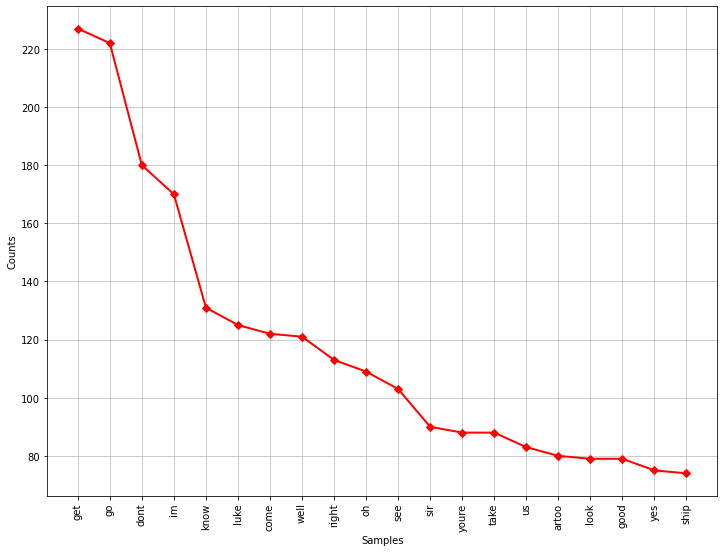

In [15]:
#plotting the top 20 frequent words
figure = plt.figure(figsize = (12, 9))
freqDist.plot(20, cumulative=False, color='red', marker='D')
plt.show()

--------------

Task 8: Use Word Clouds to visually represent the most repeated words for Darth Vader and Yoda. (Use the provided word cloud masks, make a single word cloud for each character).

In [16]:
#extracting the words from the corresponding

darthvader = starwars[starwars.character=="VADER"]
yoda = starwars[starwars.character=="YODA"]

#listing
darthvader = list(itertools.chain.from_iterable(darthvader.new_script))
yoda = list(itertools.chain.from_iterable(yoda.new_script))
yoda

['hmmm',
 'much',
 'anger',
 'like',
 'father',
 'hah',
 'ready',
 'ready',
 'know',
 'ready',
 'eight',
 'hundred',
 'year',
 'train',
 'jedi',
 'counsel',
 'keep',
 'train',
 'jedi',
 'must',
 'deep',
 'commitment',
 'serious',
 'mind',
 'one',
 'long',
 'time',
 'watch',
 'never',
 'mind',
 'hmm',
 'hmph',
 'adventure',
 'heh',
 'excitement',
 'heh',
 'jedi',
 'crave',
 'thing',
 'reckless',
 'old',
 'yes',
 'old',
 'begin',
 'train',
 'finish',
 'begin',
 'oh',
 'run',
 'yes',
 'jedis',
 'strength',
 'flow',
 'force',
 'beware',
 'dark',
 'side',
 'angerfearaggression',
 'dark',
 'side',
 'force',
 'easily',
 'flow',
 'quick',
 'join',
 'fight',
 'start',
 'dark',
 'path',
 'forever',
 'dominate',
 'destiny',
 'consume',
 'obiwans',
 'apprentice',
 'nonono',
 'quick',
 'easy',
 'seductive',
 'know',
 'calm',
 'peace',
 'passive',
 'jedi',
 'use',
 'force',
 'knowledge',
 'defense',
 'never',
 'attack',
 'nothing',
 'teach',
 'today',
 'clear',
 'mind',
 'question',
 'mmm',
 'mmmmmm

In [17]:
#reading the list in the maasked images
vadermask= np.array(Image.open("vader.jpg"))
yodamask = np.array(Image.open('yoda.png'))

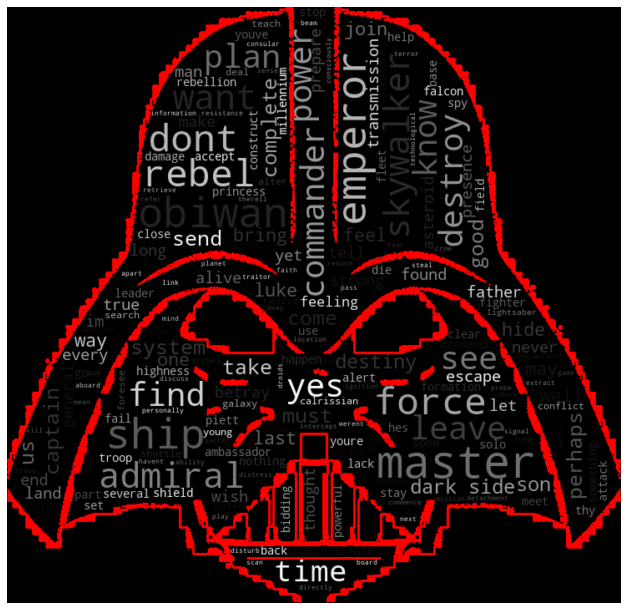

In [18]:
#plotting the Darth Vader mask
plt.subplots(figsize=(11,11))

wordcloud = WordCloud(mask=vadermask,background_color="black",colormap="gray" ,contour_width=2, contour_color="red",width=700,height=700).generate(" ".join(str(x) for x in darthvader))

plt.imshow(wordcloud ,interpolation='bilinear')
plt.axis('off')

plt.show()

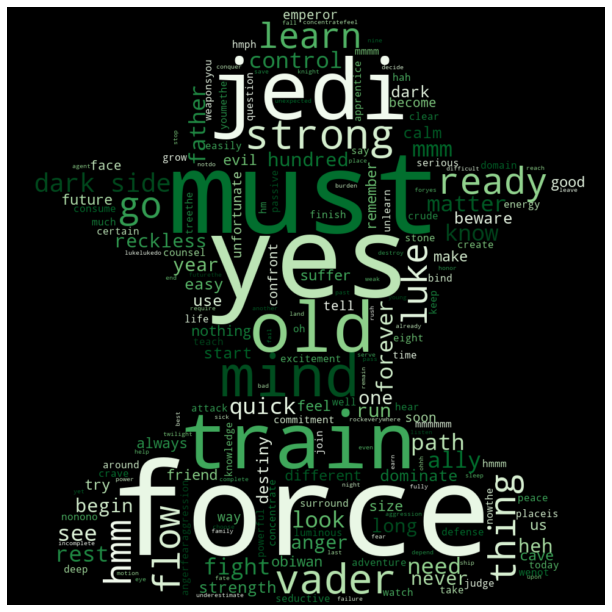

In [19]:
#plotting the Yoda mask
plt.subplots(figsize=(11,11))

wordcloud = WordCloud(mask=yodamask,background_color="black",colormap="Greens" ,contour_width=3, contour_color="black",width=700,height=700).generate(" ".join(str(x) for x in yoda))

plt.imshow(wordcloud ,interpolation='bilinear')
plt.axis('off')

plt.show()

-----------

Task 9: Discover the most relevant words in The Original Trilogy script.
The TF-IDF model contains information on the more important and less important words (relevance).

In [20]:
#merging all the dialogues
merged_dialogues = " ".join(str(x) for x in starwars['dialogue'])

In [21]:
merged_dialogues

'Did you hear that?  They\'ve shut down the main reactor.  We\'ll be destroyed for sure.  This is madness! We\'re doomed! There\'ll be no escape for the Princess this time. What\'s that? I should have known better than to trust the logic of a half-sized thermocapsulary dehousing assister... Hurry up!  Come with me!  What are you waiting for?!  Get in gear! Artoo! Artoo-Detoo, where are you? At last!  Where have you been? They\'re heading in this direction. What are we going to do?  We\'ll be sent to the spice mines of Kessel or smashed into who knows what! Wait a minute, where are you going? The Death Star plans are not in the main computer. Where are those transmissions you intercepted? We intercepted no transmissions. Aaah...  This is a consular ship. Were on a diplomatic mission. If this is a consular ship... where is the Ambassador? Commander, tear this ship apart until you\'ve found those plans and bring me the Ambassador.  I want her alive! There she is! Set for stun! She\'ll be 

In [22]:
#TFIDF vector initialization
tfidf_vect=TfidfVectorizer(use_idf=True, analyzer='word', stop_words= 'english') 
 
#fitting merged dialogues
tfidf_vect_vectors=tfidf_vect.fit_transform([merged_dialogues])

In [23]:
#for presentation and highlighting important words adding tfidf values in data frame
df = pd.DataFrame(tfidf_vect_vectors[0].T.todense(),  index=tfidf_vect.get_feature_names(), columns=["Importance Score"]) 
df.sort_values(by=["Importance Score"],ascending=False).head(10)

,Importance Score
don,0.311523
ll,0.266774
luke,0.235793
going,0.208255
oh,0.194486
right,0.194486
ve,0.192765
come,0.189323
know,0.180718
sir,0.156622


------------

Task 10: Perform sentiment analysis on the movie scripts.

In [24]:
#Getting the sentiment scores and determining their positivity and negativity
starwars_sentiment = SentimentIntensityAnalyzer()
starwars['sentiment_scores'] = starwars['dialogue'].apply(lambda dialogue: 
                                         starwars_sentiment.polarity_scores(dialogue))
starwars['compound_score']  = starwars['sentiment_scores'].apply(lambda score_dict: score_dict['compound'])
starwars['resulting_sentiment'] = starwars['compound_score'].apply(lambda c: 'pos' if c >=0 else 'neg')
starwars

,character,dialogue,episode_no,new_script,sentiment_scores,compound_score,resulting_sentiment
0,THREEPIO,Did you hear that? They've shut down the main...,IV,"[hear, theyve, shut, main, reactor, well, dest...","{'neg': 0.27, 'neu': 0.633, 'pos': 0.097, 'com...",-0.6239,neg
1,THREEPIO,We're doomed!,IV,[doom],"{'neg': 0.818, 'neu': 0.182, 'pos': 0.0, 'comp...",-0.6696,neg
2,THREEPIO,There'll be no escape for the Princess this time.,IV,"[therell, escape, princess, time]","{'neg': 0.202, 'neu': 0.642, 'pos': 0.156, 'co...",-0.1280,neg
3,THREEPIO,What's that?,IV,[whats],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
4,THREEPIO,I should have known better than to trust the l...,IV,"[know, better, trust, logic, halfsized, thermo...","{'neg': 0.0, 'neu': 0.659, 'pos': 0.341, 'comp...",0.7351,pos
...,...,...,...,...,...,...,...
2518,LANDO,"Wedge, I don't think we're going to make it.",VI,"[wedge, dont, think, go, make]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
2519,WEDGE,You'll make it. Just follow me Gold Leader.,VI,"[youll, make, follow, gold, leader]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
2520,LANDO,I promised to return his ship without a scratc...,VI,"[promise, return, ship, without, scratchi, sur...","{'neg': 0.223, 'neu': 0.511, 'pos': 0.266, 'co...",0.2100,pos
2521,HAN,Lando...,VI,[lando],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos


<AxesSubplot:ylabel='resulting_sentiment'>

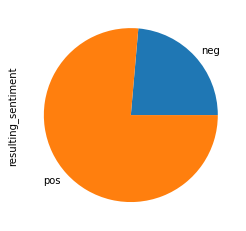

In [25]:
#its apparent that most the dialogues have a positive sentiment
starwars.groupby("resulting_sentiment")["resulting_sentiment"].count().plot(kind="pie")

We will look at the sentiments of "Light Side" characters such as Luke and Yoda vs "Dark Side" characters such as Darth Vader and emperor Palpatine

**Light Side vs Dark Side Showdown**

**Light Side**

**Luke**

<AxesSubplot:title={'center':'Character: LUKE'}, ylabel='resulting_sentiment'>

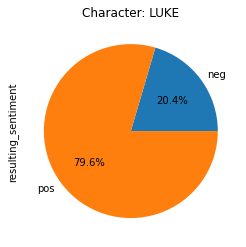

In [26]:
#Luke Skywalker: 79.6% positive 20.4% negative sentiment in his dialogue
starwars[(starwars["character"] == 'LUKE')].groupby("resulting_sentiment")["resulting_sentiment"].count().plot(kind="pie", autopct="%1.1f%%", title="Character: LUKE")

**Yoda**

<AxesSubplot:title={'center':'Character: YODA'}, ylabel='resulting_sentiment'>

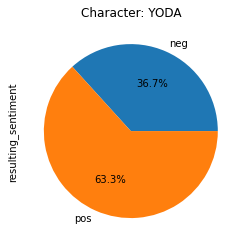

In [27]:
#Yoda: 63.3% positive 36.7% negative sentiment in his dialogue
starwars[(starwars["character"] == 'YODA')].groupby("resulting_sentiment")["resulting_sentiment"].count().plot(kind="pie", autopct="%1.1f%%", title="Character: YODA")

**Dark Side**

**Darth Vader**

<AxesSubplot:title={'center':'Character: VADER'}, ylabel='resulting_sentiment'>

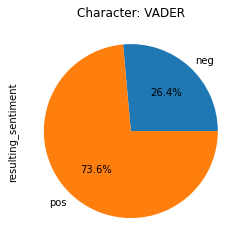

In [28]:
#Darth Vader: 73.6% positive 26.4% negative sentiment in his dialogue
starwars[(starwars["character"] == 'VADER')].groupby("resulting_sentiment")["resulting_sentiment"].count().plot(kind="pie", autopct="%1.1f%%", title="Character: VADER")

**Emperor**

<AxesSubplot:title={'center':'Character: EMPEROR'}, ylabel='resulting_sentiment'>

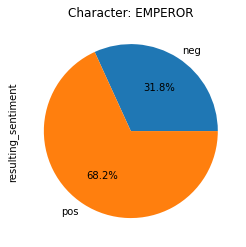

In [29]:
#Emporer: 38.2% positive 31.8% negative sentiment in his dialogue
starwars[(starwars["character"] == 'EMPEROR')].groupby("resulting_sentiment")["resulting_sentiment"].count().plot(kind="pie", autopct="%1.1f%%", title="Character: EMPEROR")

##### Highest positive sentiment: Luke Skywalker
##### Lowest positive sentiment: Master Yoda
##### Highest negative sentiment: Master Yoda
##### Lowest negative sentiment: Luke Skywalker

While wathcing the movies, the audience can't decide on the sentimental projections of the above characters, however through sentimental analysis, we have come to the conclusions that are not apparent otherwise.

---------